In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
import matplotlib.pyplot as plt
import pathlib
from ssd.utils import load_config

In [2]:
cfg = load_config("../configs/ssd300_improved.py")
logs = tops.logger.read_logs(pathlib.Path("../outputs/ssd300_improved"))

Saving SSD outputs to: outputs/


In [3]:
# The log is formatted as a list of dictionaries
print(logs[:10])

[{'amp/grad_scale': 32768.0, 'global_step': 0}, {'loss/regression_loss': 4.652359962463379, 'loss/classification_loss': 17.81990623474121, 'loss/total_loss': 22.472267150878906, 'global_step': 0}, {'amp/grad_scale': 16384.0, 'global_step': 1}, {'stats/learning_rate': 0.00010180000000000001, 'global_step': 2}, {'stats/learning_rate': 0.00010360000000000001, 'global_step': 3}, {'stats/learning_rate': 0.00010540000000000001, 'global_step': 4}, {'stats/learning_rate': 0.00010720000000000002, 'global_step': 5}, {'stats/learning_rate': 0.00010900000000000002, 'global_step': 6}, {'stats/learning_rate': 0.00011080000000000001, 'global_step': 7}, {'stats/learning_rate': 0.00011260000000000001, 'global_step': 8}]


In [4]:
# We are saving logs to disk every 10th iteration, thus we need to filter out all entries without a loss
loss_entries = [entry for entry in logs if "loss/regression_loss" in entry]

Text(0.5, 0, 'Global step (number of batches trained on)')

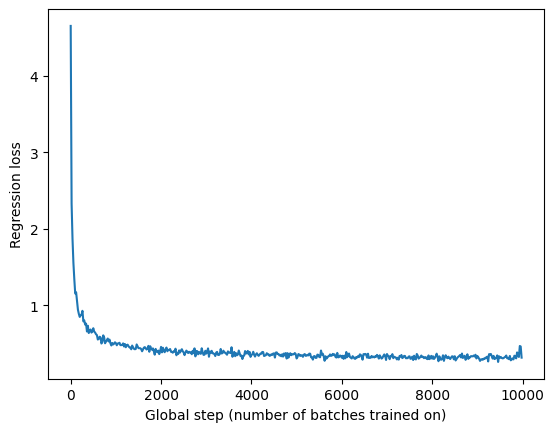

In [5]:
plt.plot([entry["global_step"] for entry in loss_entries], [entry["loss/regression_loss"] for entry in loss_entries])
plt.ylabel("Regression loss")
plt.xlabel("Global step (number of batches trained on)")